# ARIMA, Prophet을 이용한 시계열분석 실습
https://www.kaggle.com/code/cdabakoglu/time-series-forecasting-arima-lstm-prophet

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
df = pd.read_csv('./monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [6]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
df.index.freq = 'MS'

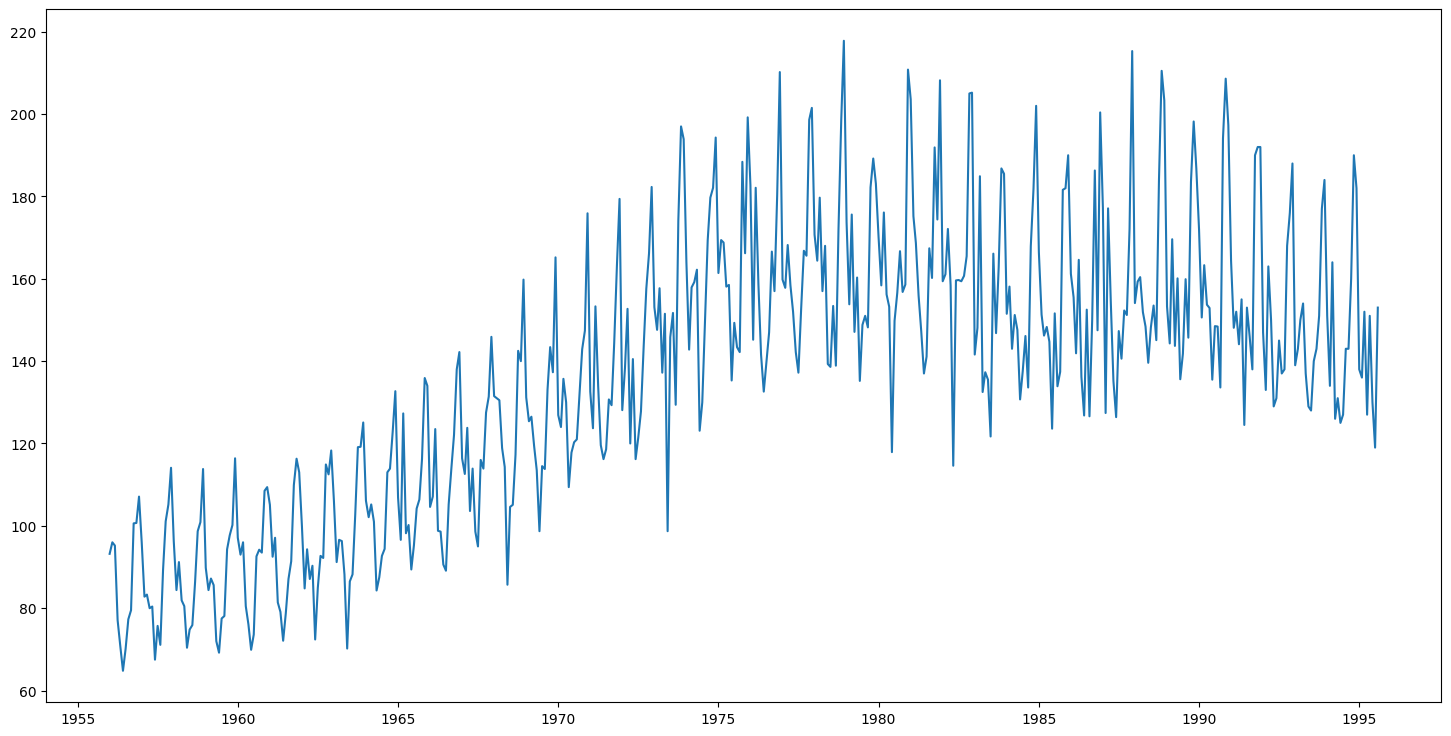

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

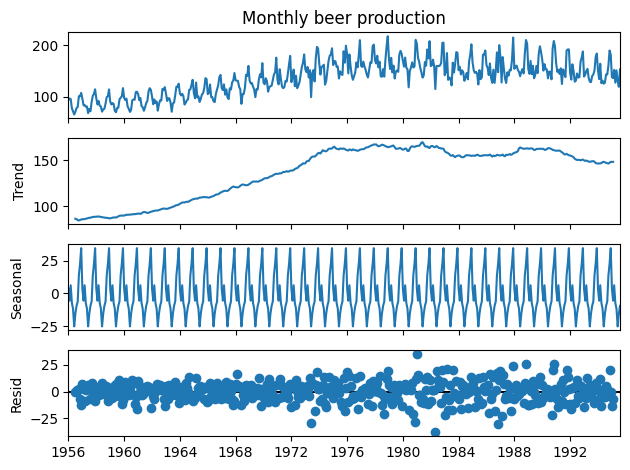

In [9]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

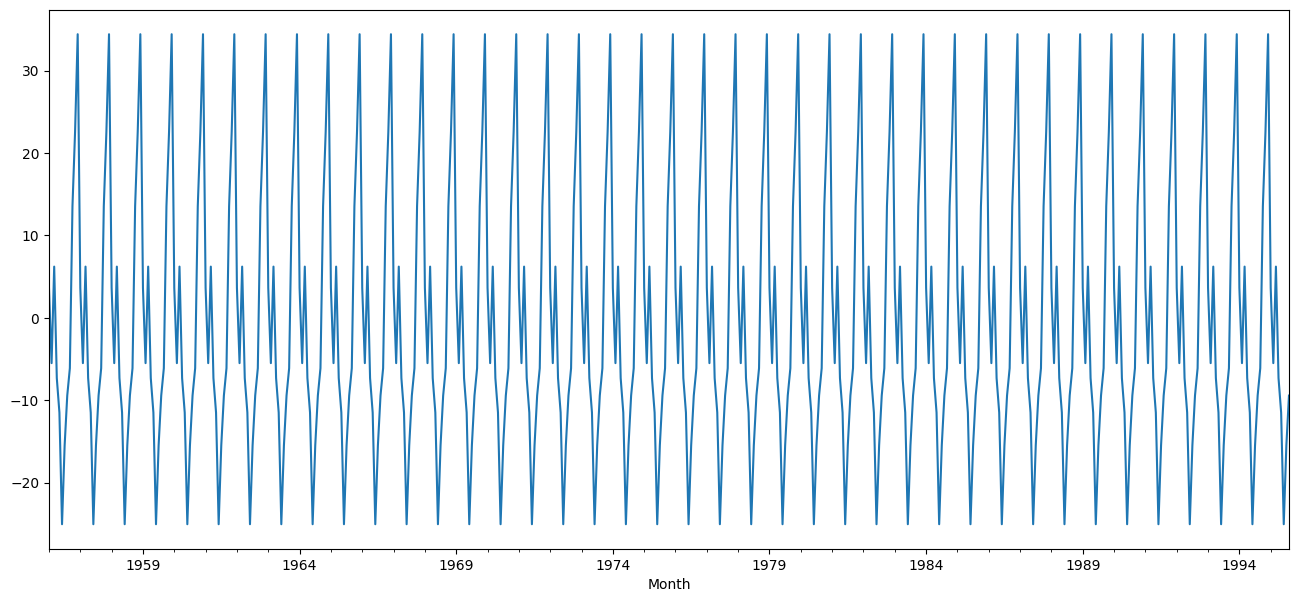

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

In [11]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [12]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.25910D-02

At iterate   15    f=  3.75360D+00    |proj g|=  5.39475D-02

At iterate   20    f=  3.71374D+00    |proj g|=  1.11419D-02

At iterate   25    f=  3.71142D+00    |proj g|=  1.82138D-02

At iterate   30    f=  3.70643D+00    |proj g|=  9.66216D-02

At iterate   35    f=  3.68872D+00    |proj g|=  2.63598D-02

At iterate   40    f=  3.68160D+00    |proj g|=  1.28160D-02

At iterate   45    f=  3.68105D+00    |proj g|=  2.66874D-03

At iterate   50    f=  3.68054D+00    |proj g|=  2.57380D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.772
Date:                                    Tue, 29 Aug 2023   AIC                           3437.545
Time:                                            01:33:58   BIC                           3483.060
Sample:                                        01-01-1956   HQIC                          3455.463
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1265      0.042     -3.023      0.003      -0.208      -0.044
ar.L2         -0.1824      0.036     -5.015      0.000      -0.254      -0.111
ma.L1         -0.8346      0.029    -28.893      0.000      -0.891      -0.778
ar.S.L12       1.7592      0.102     17.308      0.000       1.560       1.958
ar.S.L24      -1.6281      0.191     -8.513      0.000      -2.003      -1.253
ar.S.L36       0.8036      0.146      5.490      0.000       0.517       1.090
ar.S.L48       0.0641      0.052      1.225      0.221      -0.038       0.167
ma.S.L12      -1.5654      0.117    -13.351      0.000      -1.795      -1.336
ma.S.L24       1.4181      0.193      7.343      0.000       1.040       1.797
ma.S.L36      -0.6776      0.112     -6.065      0.000      -0.897      -0.459
sigma2        85.1983      5.107     16.684      0.000      75.189      95.207
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                40.08
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.738961
1994-10-01    157.676776
1994-11-01    182.189194
1994-12-01    183.509131
1995-01-01    144.586846
1995-02-01    136.835901
1995-03-01    150.999655
1995-04-01    133.094442
1995-05-01    138.150004
1995-06-01    120.320278
1995-07-01    128.312508
1995-08-01    138.738779
Freq: MS, Name: ARIMA Predictions, dtype: float64

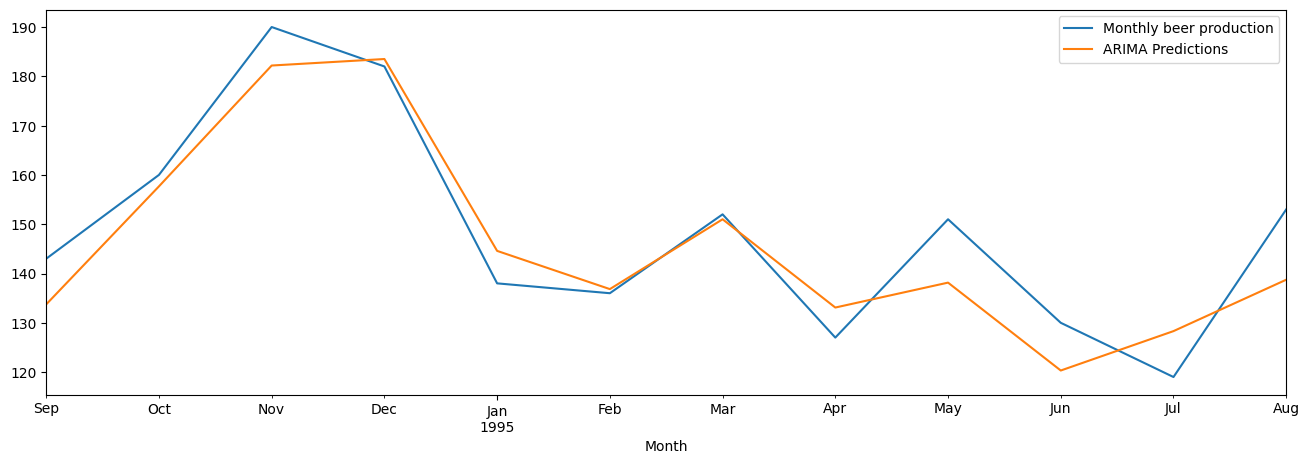

In [14]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [15]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.46693106036201
RMSE Error: 8.091163764277795
Mean: 136.3953781512605


In [16]:
test_data['ARIMA_Predictions'] = arima_pred

## Prophet Forecast

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [18]:
df_pr = df.copy()
df_pr = df.reset_index()

In [19]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [20]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [21]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [22]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

01:33:58 - cmdstanpy - INFO - Chain [1] start processing
01:33:59 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.025312,130.897177,156.039167,150.965773,151.102272,-7.938921,-7.938921,-7.938921,-7.938921,-7.938921,-7.938921,0.0,0.0,0.0,143.086391
472,1995-05-01,150.960512,126.966062,151.489723,150.869496,151.054097,-11.401718,-11.401718,-11.401718,-11.401718,-11.401718,-11.401718,0.0,0.0,0.0,139.558793
473,1995-06-01,150.893550,114.406269,138.575440,150.775263,151.009298,-23.933370,-23.933370,-23.933370,-23.933370,-23.933370,-23.933370,0.0,0.0,0.0,126.960181
474,1995-07-01,150.828749,122.630391,147.728883,150.681717,150.974763,-15.749132,-15.749132,-15.749132,-15.749132,-15.749132,-15.749132,0.0,0.0,0.0,135.079618
475,1995-08-01,150.761788,128.832040,153.177345,150.587911,150.936129,-9.222256,-9.222256,-9.222256,-9.222256,-9.222256,-9.222256,0.0,0.0,0.0,141.539532


In [24]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [25]:
prophet_pred = prophet_pred.set_index("Date")

In [26]:
prophet_pred.index.freq = "MS"

In [27]:
prophet_pred

,Pred
Date,
1994-09-01,144.974488
1994-10-01,165.972385
1994-11-01,173.610375
1994-12-01,185.859704
1995-01-01,155.146580
1995-02-01,146.700673
1995-03-01,158.795928
1995-04-01,143.086391
1995-05-01,139.558793


In [28]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [29]:
import seaborn as sns

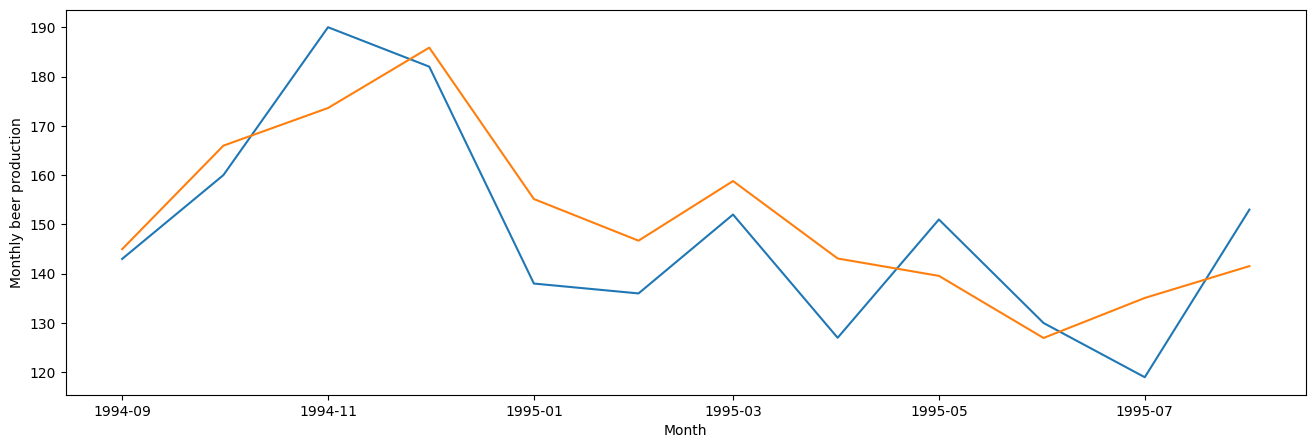

In [30]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [31]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.54912149579494
RMSE Error: 11.425809445977775
Mean: 136.3953781512605


In [32]:
rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


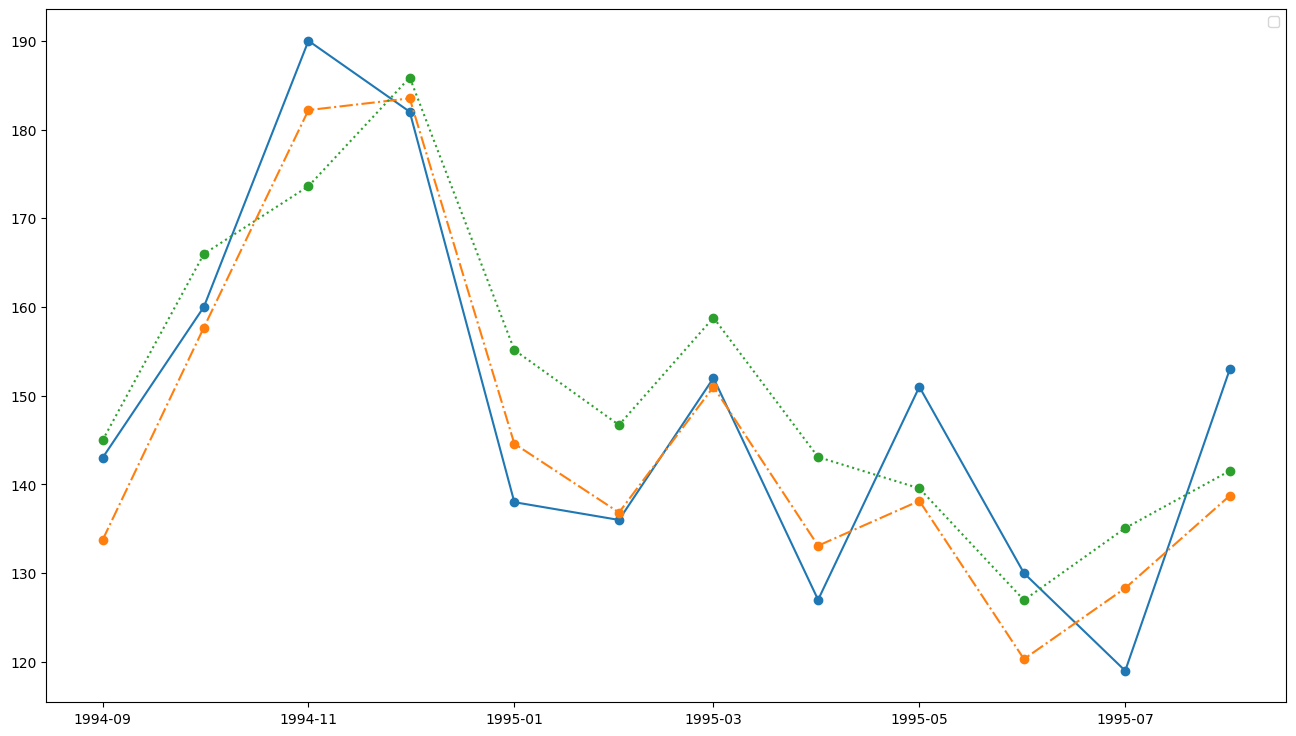

In [33]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [34]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.091164,65.466931
1,Prophet,11.425809,130.549121


In [35]:
test_data

,Monthly beer production,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,133.738961,144.974488
1994-10-01,160.0,157.676776,165.972385
1994-11-01,190.0,182.189194,173.610375
1994-12-01,182.0,183.509131,185.859704
1995-01-01,138.0,144.586846,155.146580
1995-02-01,136.0,136.835901,146.700673
1995-03-01,152.0,150.999655,158.795928
1995-04-01,127.0,133.094442,143.086391
1995-05-01,151.0,138.150004,139.558793
